Эпоха [100/1000], Потеря: 0.0524
Эпоха [200/1000], Потеря: 0.0201
Эпоха [300/1000], Потеря: 0.0109
Эпоха [400/1000], Потеря: 0.0090
Эпоха [500/1000], Потеря: 0.0077
Эпоха [600/1000], Потеря: 0.0069
Эпоха [700/1000], Потеря: 0.0063
Эпоха [800/1000], Потеря: 0.0059
Эпоха [900/1000], Потеря: 0.0056
Эпоха [1000/1000], Потеря: 0.0053


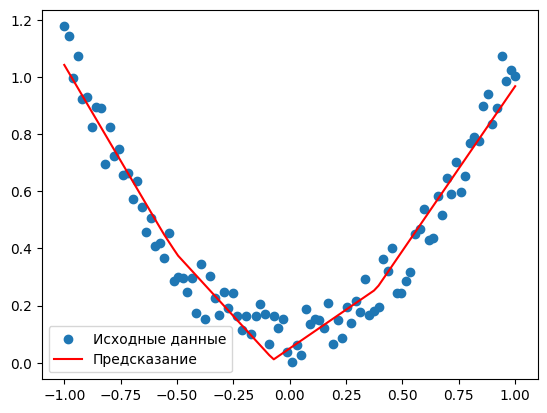

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
torch.manual_seed(42)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

# Определение нейронной сети
class NonlinearRegressionModel(nn.Module):
    def __init__(self):
        super(NonlinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = NonlinearRegressionModel()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = X
    targets = y

    # Прямой проход
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Обратное распространение и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Эпоха [{epoch + 1}/{num_epochs}], Потеря: {loss.item():.4f}')

# Визуализация результата
predicted = model(X).detach().numpy()
plt.scatter(X, y, label='Исходные данные')
plt.plot(X, predicted, 'r', label='Предсказание')
plt.legend()
plt.show()

torch.Size([100, 1]) tensor([[1.1765e+00],
        [1.1430e+00],
        [9.9740e-01],
        [1.0743e+00],
        [9.2300e-01],
        [9.2836e-01],
        [8.2358e-01],
        [8.9590e-01],
        [8.9104e-01],
        [6.9606e-01],
        [8.2369e-01],
        [7.2365e-01],
        [7.4780e-01],
        [6.5726e-01],
        [6.6255e-01],
        [5.7165e-01],
        [6.3510e-01],
        [5.4586e-01],
        [4.5827e-01],
        [5.0514e-01],
        [4.0909e-01],
        [4.1977e-01],
        [3.6803e-01],
        [4.5294e-01],
        [2.8644e-01],
        [2.9887e-01],
        [2.9715e-01],
        [2.4648e-01],
        [2.9809e-01],
        [1.7275e-01],
        [3.4550e-01],
        [1.5473e-01],
        [3.0219e-01],
        [2.2775e-01],
        [1.6558e-01],
        [2.4760e-01],
        [1.8997e-01],
        [2.4457e-01],
        [1.6491e-01],
        [1.1346e-01],
        [1.6370e-01],
        [1.0237e-01],
        [1.6504e-01],
        [2.0653e-01],
        [1.

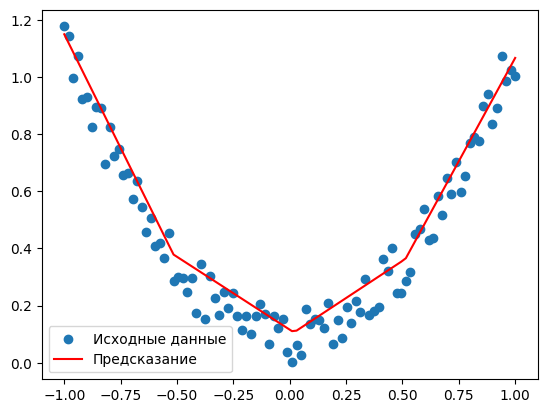

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
torch.manual_seed(42)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(2) + 0.2 * torch.rand(X.size())
print(y.shape, y)

# Определение размера батча
batch_size = 32

# Создание DataLoader для автоматической обработки батчей
dataset = torch.utils.data.TensorDataset(X, y)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Определение нейронной сети
class NonlinearRegressionModel(nn.Module):
    def __init__(self):
        super(NonlinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = NonlinearRegressionModel()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Обучение модели с использованием батчей
num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        # Прямой проход
        outputs = model(inputs)
        print(outputs.shape, targets.shape, outputs[0], targets[0])
        loss = criterion(outputs, targets)

        # Обратное распространение и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Эпоха [{epoch + 1}/{num_epochs}], Потеря: {loss.item():.4f}')

# Визуализация результата
predicted = model(X).detach().numpy()
plt.scatter(X, y, label='Исходные данные')
plt.plot(X, predicted, 'r', label='Предсказание')
plt.legend()
plt.show()

In [13]:
torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

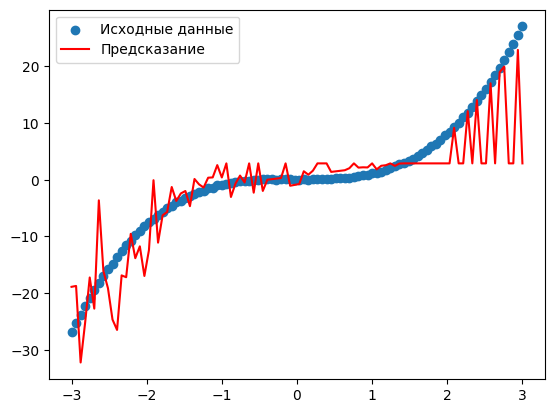

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
torch.manual_seed(42)
X = torch.unsqueeze(torch.linspace(-3, 3, 100), dim=1)
y = X.pow(3) + 0.2 * torch.rand(X.size())

# Определение нейронной сети с Dropout
class NonlinearRegressionModel(nn.Module):
    def __init__(self, dropout_prob):
        super(NonlinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout слой с вероятностью отключения
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Применяем Dropout после активации
        x = self.fc2(x)
        return x

# Создание модели с Dropout
model = NonlinearRegressionModel(dropout_prob=0.5)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Визуализация результата
predicted = model(X).detach().numpy()
plt.scatter(X, y, label='Исходные данные')
plt.plot(X, predicted, 'r', label='Предсказание')
plt.legend()
plt.show()
